# Applicability Domain Workflow

### Introduction

Workflow for estimation of Applicability Domain (AD) based on Euclidean distances. 

The AD of a QSAR model must be defined to flag compounds in the test set for which predictions may be unreliable. In this workflow, similarity measurements are used to define the AD of the model based on the Euclidean distances among all training compounds and the test or virtual screening compounds. The distance of a test compound to its nearest neighbor in the training set is compared to the predefined AD Threshold (ADT). If the similarity is beyond this threshold, the prediction is considered unreliable.

ADT is calculated as follows: 

ADT = D + Zσ 

Calculation of D and σ is performed as follows: First, the average of Euclidean distances between all pairs of training compounds is calculated. Next, the set of distances that were lower than the average is formulated. D and σ are finally calculated as the average and standard deviation of all distances included in this set. Z is an empirical cutoff value and the default value is 0.5.

This method has been defined by A. Golbraikh, M. Shen, Z. Xiao, Y.-D. Xiao, K.-H. Lee, A. Tropsha. J. Comput. Aided. Mol. Des. 2003, 17 (2–4), 241–253.

In [33]:
import pandas as pd
import numpy as np
from rdkit.Chem import PandasTools
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
from sklearn.model_selection import train_test_split
from scipy.spatial import distance_matrix

### ADT function

In [38]:
def calc_training_dist_matrix(training_descriptors):
    return np.sort(distance_matrix(training_descriptors,training_descriptors),axis=1)[:,1:]

def calc_d_cutoff(distance_matrix, user_cutoff=0.5):
    average_dist = np.mean(distance_matrix, axis=None)
    std_dev = np.std(distance_matrix, axis=None)
    return (average + user_cutoff * std_dev)

def calc_test_distances(testing_descriptors,training_descriptors):
    return distance_matrix(testing_descriptors,training_descriptors)

def test_against_cutoff(distances_for_compound,threshold):
    test_value = calc_d_cutoff(distances_for_compound)
    if test_value > threshold:
        return True
    return False

### Import curated dataset

,Activity,ID,MOL,Outcome,ROMol
0,-0.12,,ms_1,Inactive,

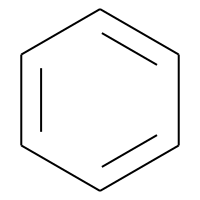

In [29]:
moldf = PandasTools.LoadSDF('dataset.sdf')
moldf.head(1)

### Calculate descriptors

In [34]:
def calcfp(mol,funcFPInfo=dict(radius=3, nBits=2048, useFeatures=False, useChirality = False)):
    fp = GetMorganFingerprintAsBitVect(mol, **funcFPInfo)
    fp = pd.Series(np.asarray(fp))
    fp = fp.add_prefix('bit_')
    return fp

morgan = moldf.ROMol.apply(calcfp)
morgan.shape

(1093, 2048)

### Prepare data for modeling


In [35]:
y = moldf['Activity']
X = morgan
X.shape

(1093, 2048)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=24)

### Estimate the ADT of the model

In [39]:
distances = calc_training_dist_matrix(X_train)

In [40]:
D_cutoff = calc_d_cutoff(distances, std_dev)
print(D_cutoff)

NameError: name 'std_dev' is not defined

### Calculate if moleles in the test set are in the AD of the model